# PUBG Kaggle Notebook

In [1]:
import os
import sys

def add_module_path_to_system():
    module_path = os.path.abspath(os.path.join('..'))
    if module_path not in sys.path:
        sys.path.append(module_path)
        return module_path 

module_path = add_module_path_to_system()

import numpy as np
import pandas as pd
import random
import PUBG_functions as pfunc

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load DataFrame and store columns to be dropped
df = pfunc.load_df()
drop_columns = ['Id', 'groupId', 'matchId', 'matchType']

## Differences in matchTypes

In [3]:
df['lobby_ct'] = df.groupby('matchId')['matchId'].transform('count')

temp = pd.DataFrame(df['lobby_ct'].groupby(by=df['matchType']).mean())
temp.columns = ['avg_lobby']
temp['max_lobby'] = df['lobby_ct'].groupby(by=df['matchType']).max()
temp['min_lobby'] = df['lobby_ct'].groupby(by=df['matchType']).min()
temp['median_lobby'] = df['lobby_ct'].groupby(by=df['matchType']).median()
temp['match_count'] = df['lobby_ct'].groupby(by=df['matchType']).count()
temp['avg_matchDuration'] = df['matchDuration'].groupby(by=df['matchType']).mean()
temp['avg_kills'] = df['kills'].groupby(by=df['matchType']).mean()
temp['med_walkDistance'] = df['walkDistance'].groupby(by=df['matchType']).median()
temp['avg_heals'] = df['heals'].groupby(by=df['matchType']).mean()


print(temp)

                  avg_lobby  max_lobby  min_lobby  median_lobby  match_count  \
matchType                                                                      
crashfpp          88.891840        100         20            92         6287   
crashtpp          75.835580         90         59            71          371   
duo               93.817319        100         38            95       313591   
duo-fpp           94.277730        100          7            95       996691   
flarefpp          82.128134         96         60            88          718   
flaretpp          87.291417         97         57            89         2505   
normal-duo        20.427136         39          8            15          199   
normal-duo-fpp    49.674075         98          7            60         5489   
normal-solo       20.165644         47          6            15          326   
normal-solo-fpp   23.605232         58          2            20         1682   
normal-squad      45.341085         99  

In [4]:
# Codify matchType to regular=0, event=1, custom=2
regular_matches = ['duo', 'duo-fpp', 'solo', 'solo-fpp', 'squad', 'squad-fpp']
event_matches = ['crashfpp', 'crashtpp', 'flarefpp', 'flaretpp']
df['matchType_code'] = df['matchType'].apply(lambda x: 0 if x in regular_matches else 1 if x in event_matches else 2)

## Outliers / Cheaters

First we'll look for cheaters in the data set. These may be removed later if it aids our model.

#### Individual Features
Create features to see if players are healing or moving significantly more than we would expect.

In [5]:
# Create Individual Features
df['total_heals'] = df['boosts'] + df['heals']
df['total_Distance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

#### Headshot Percentage
Find out how many kills were headshot kills, if this number is too high we may consider the player is using an aimbot.

In [6]:
# How many kills were done with headshots
df['headshotAcc'] = df['headshotKills'] / df['kills']
df['headshotAcc'].replace([np.inf, -np.inf], 0, inplace=True)
df['headshotAcc'].fillna(df['headshotKills'], inplace=True)

#### Road Kills over Distance
Getting kills without ever moving in the vehicle is suspicious.  This could be players hacking and "flying" their vehicles around and killing players.

In [7]:
# Roadkills without any driving
df['roadKills_per_distance'] = df['roadKills'] / df['rideDistance']
df['roadKills_per_distance'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['roadKills_per_distance'].fillna(df['roadKills'], inplace=True)

#### Kills Without Movement
Getting kills with little to no movement is extremely suspicious.  Some players have hacks that can drop them into a game with a weapon and can clear the entire lobby without every moving, snapping from player to player killing them through terrain and structures.

In [8]:
# Kills with nearly 0 movement
df['kill_per_distance'] = df['kills'] / df['total_Distance']
df['kill_per_distance'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['kill_per_distance'].fillna(df['kills'], inplace=True)

Now we'll plot all features once with all games and once with non-custom matches.

C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


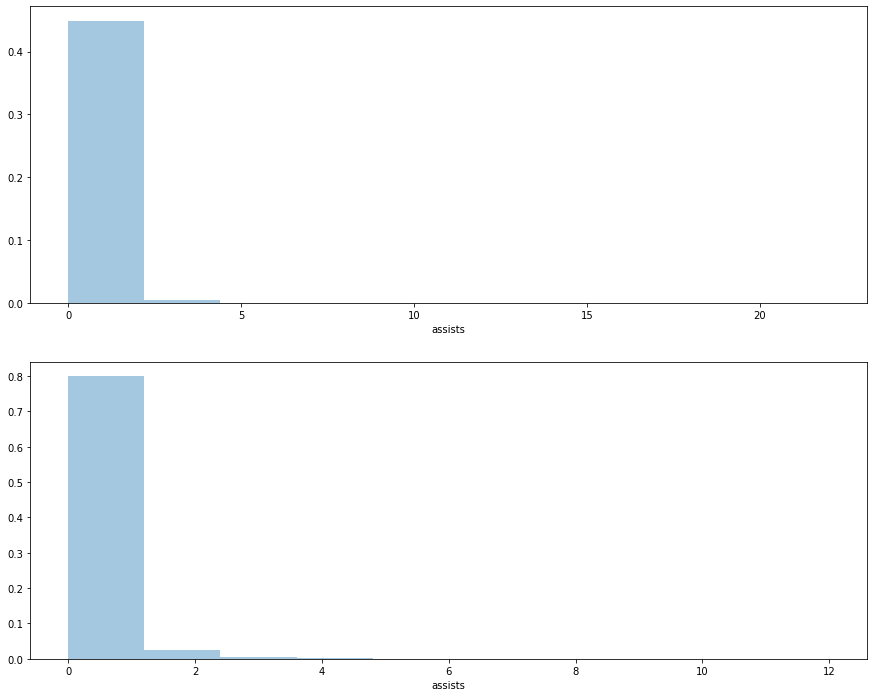

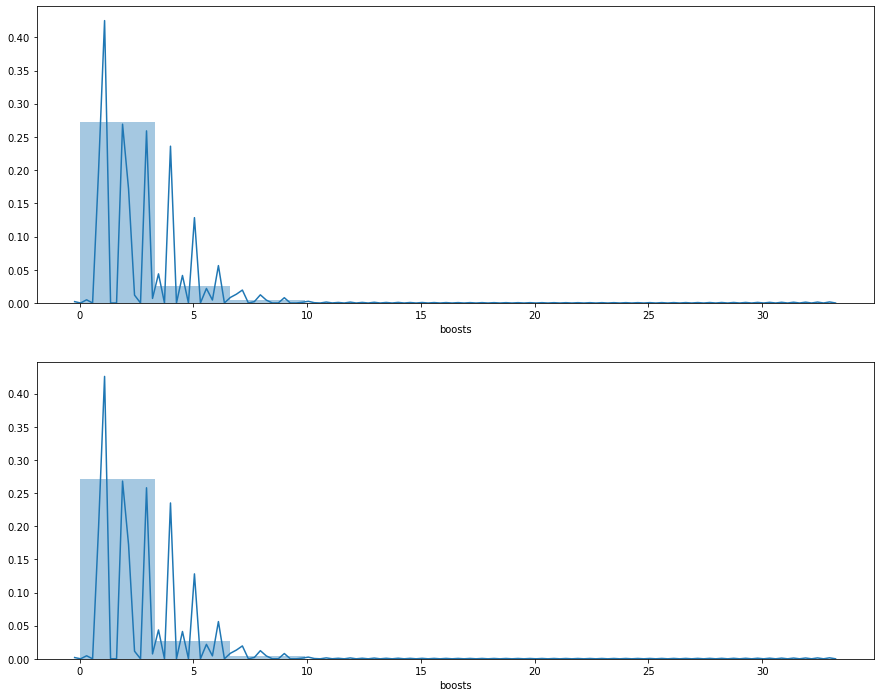

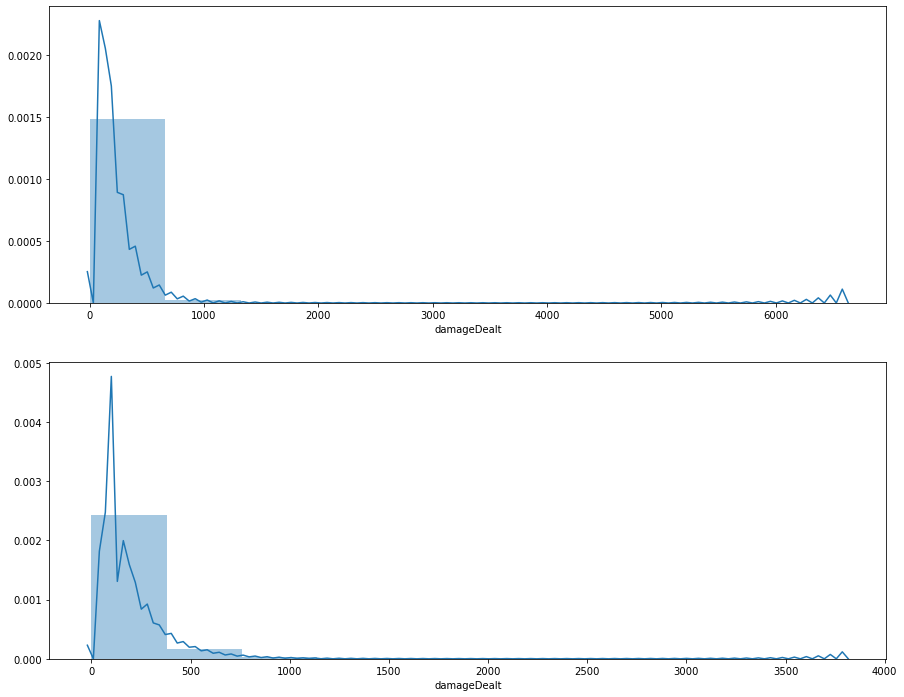

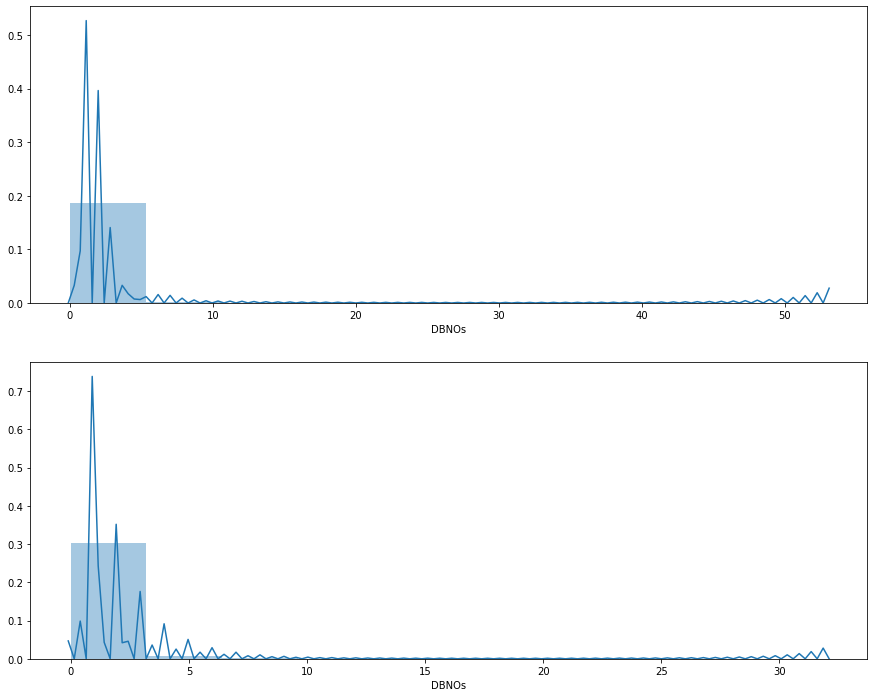

C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


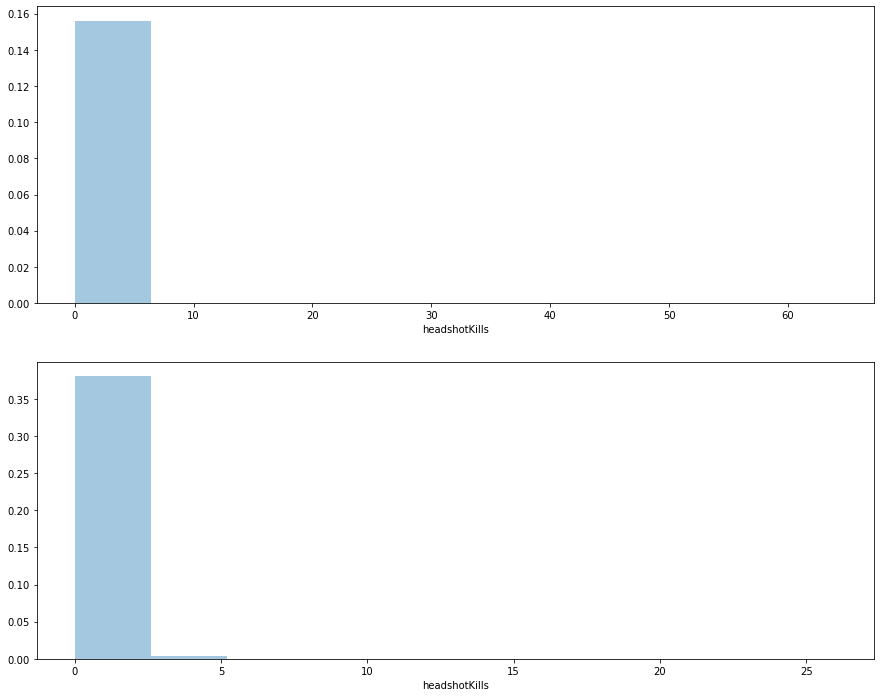

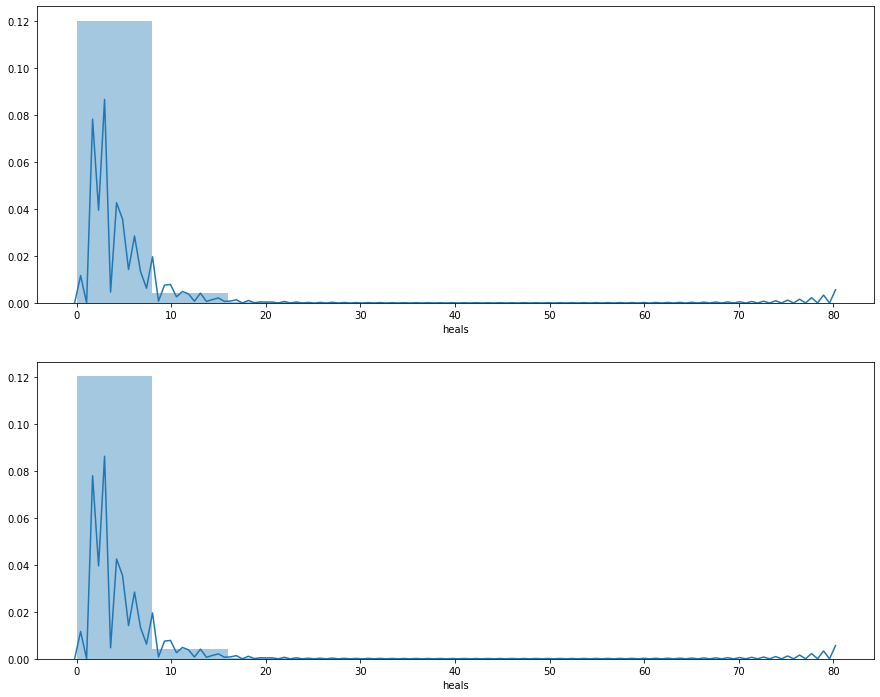

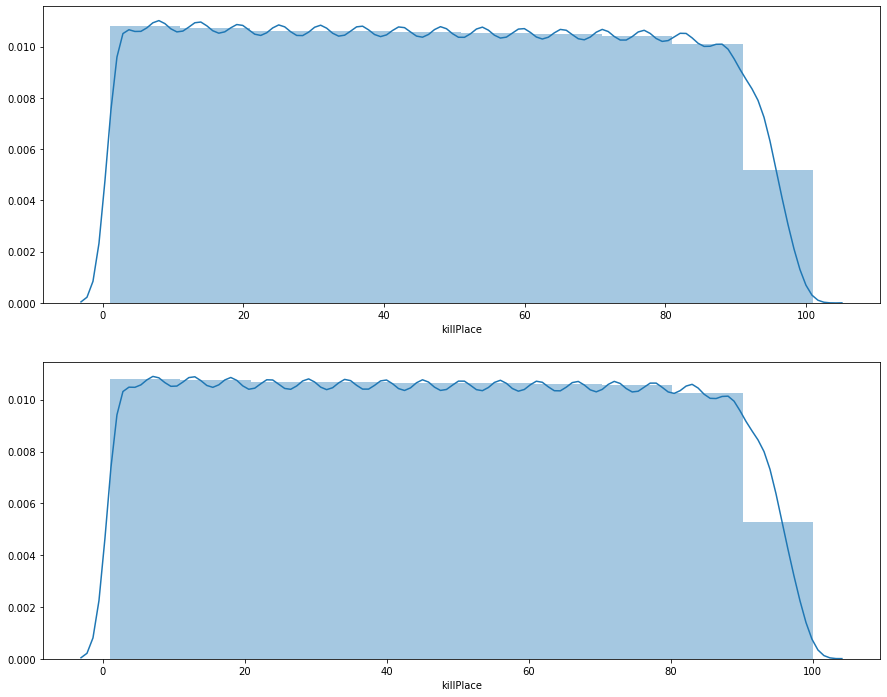

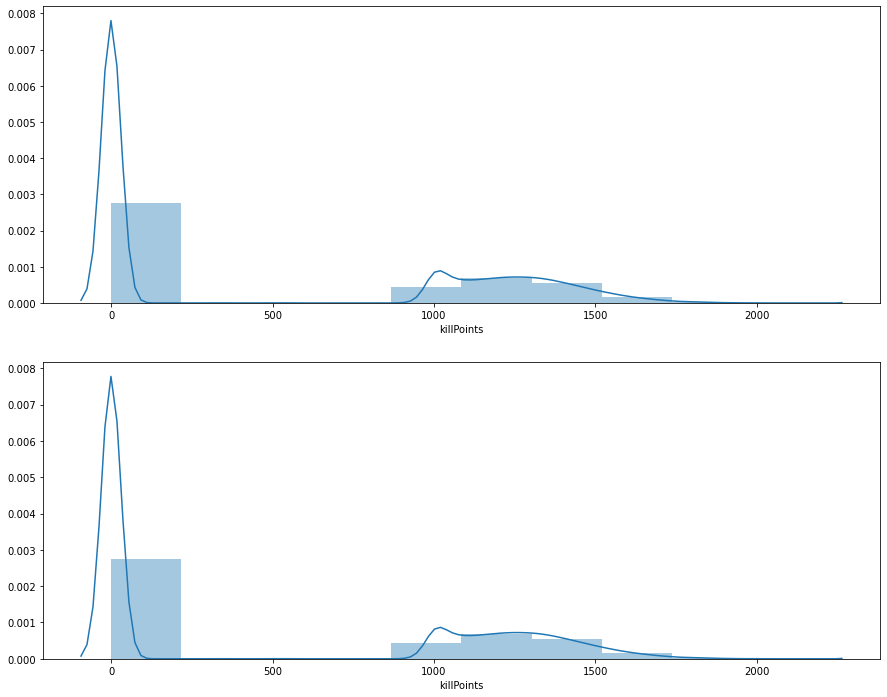

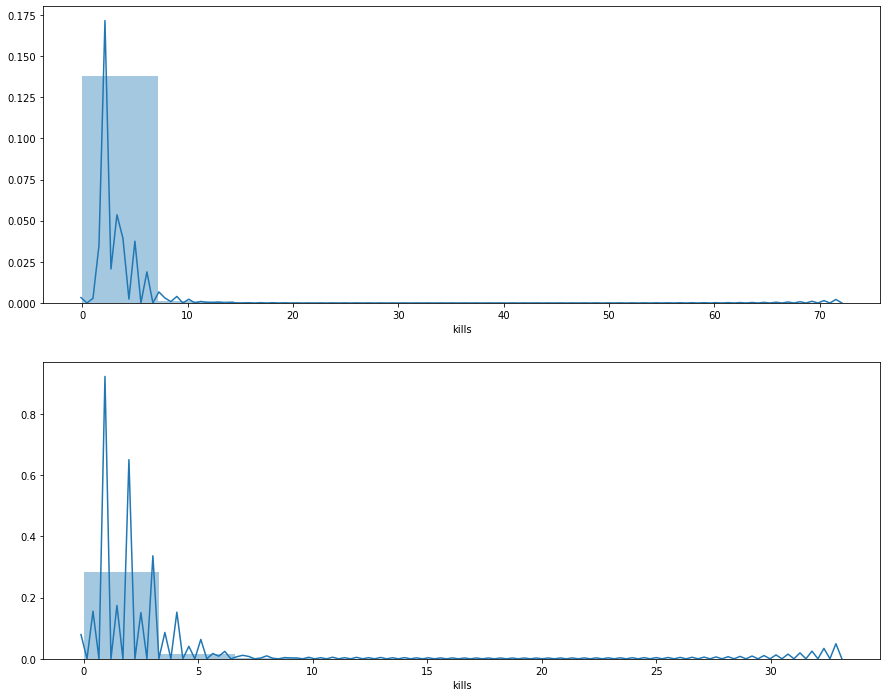

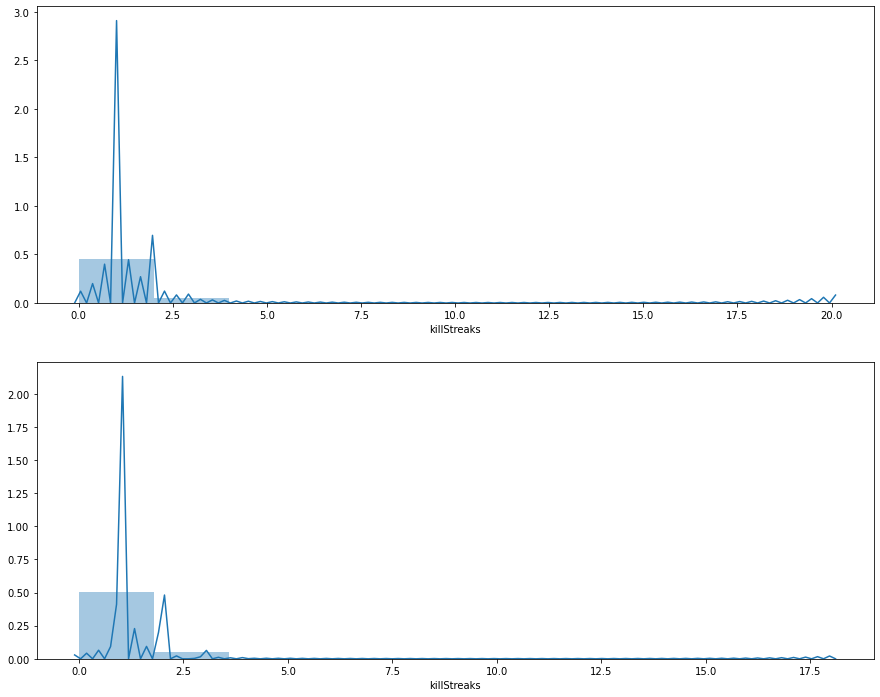

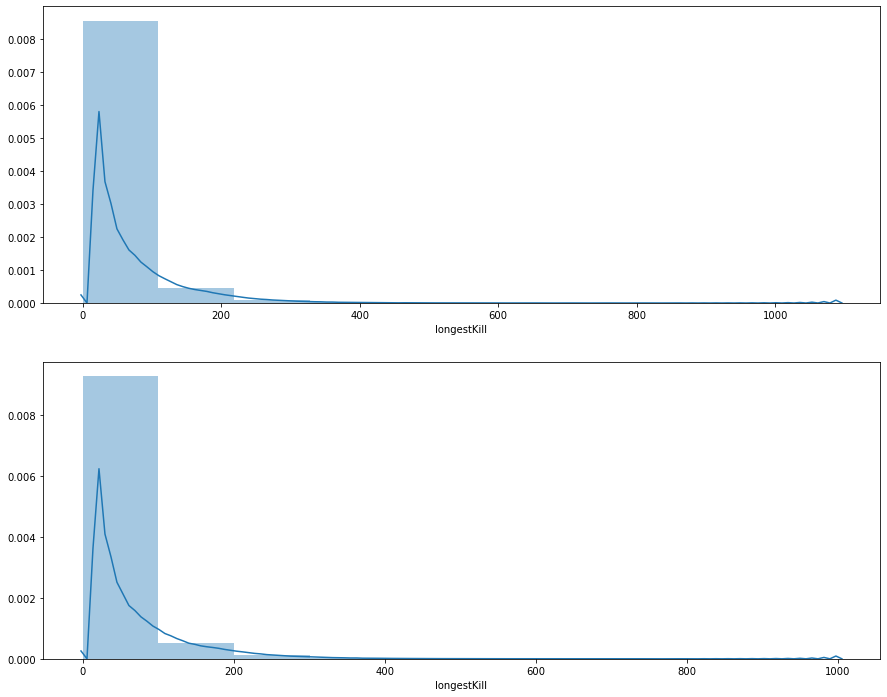

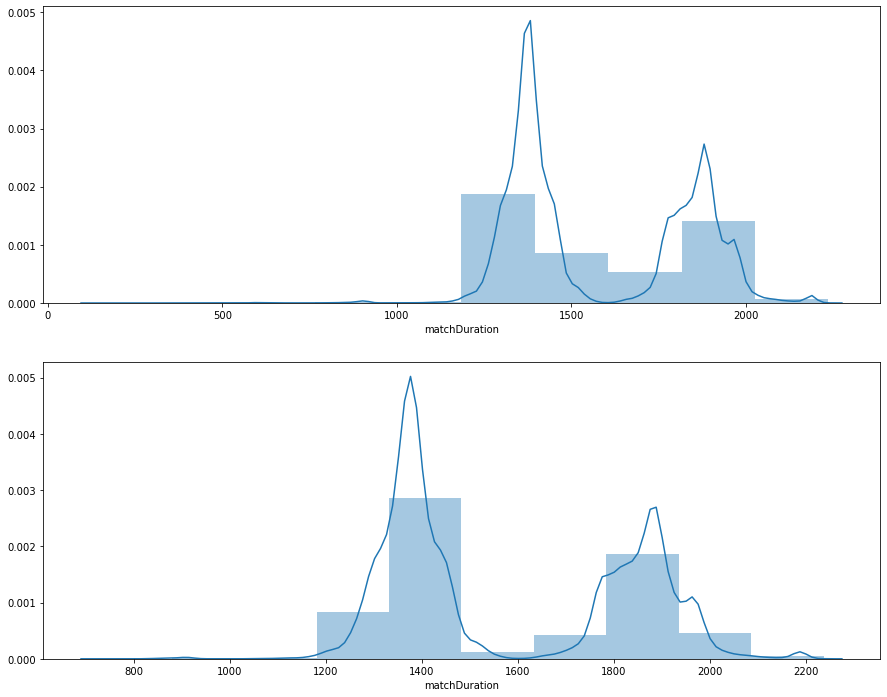

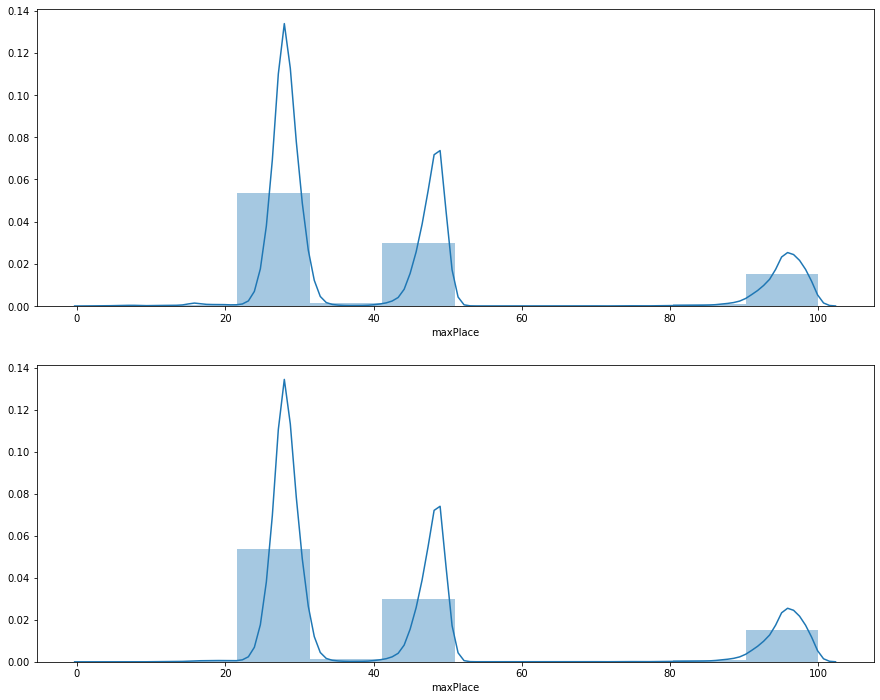

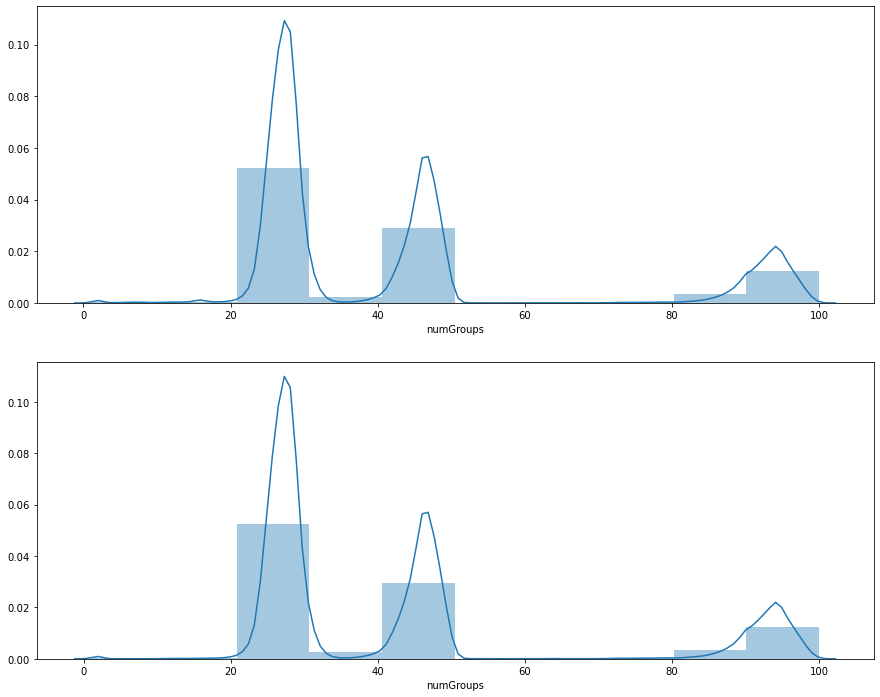

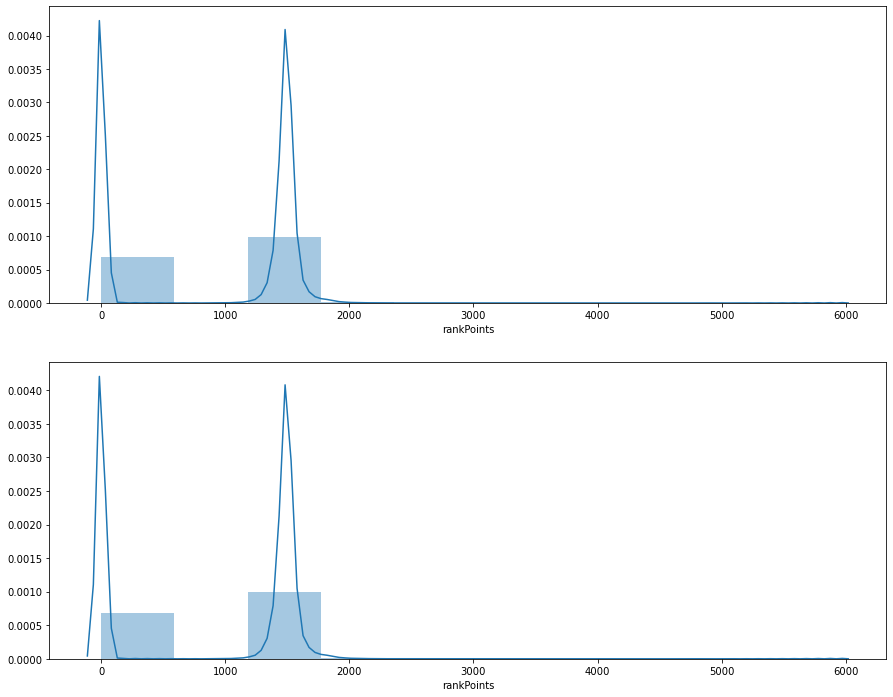

C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


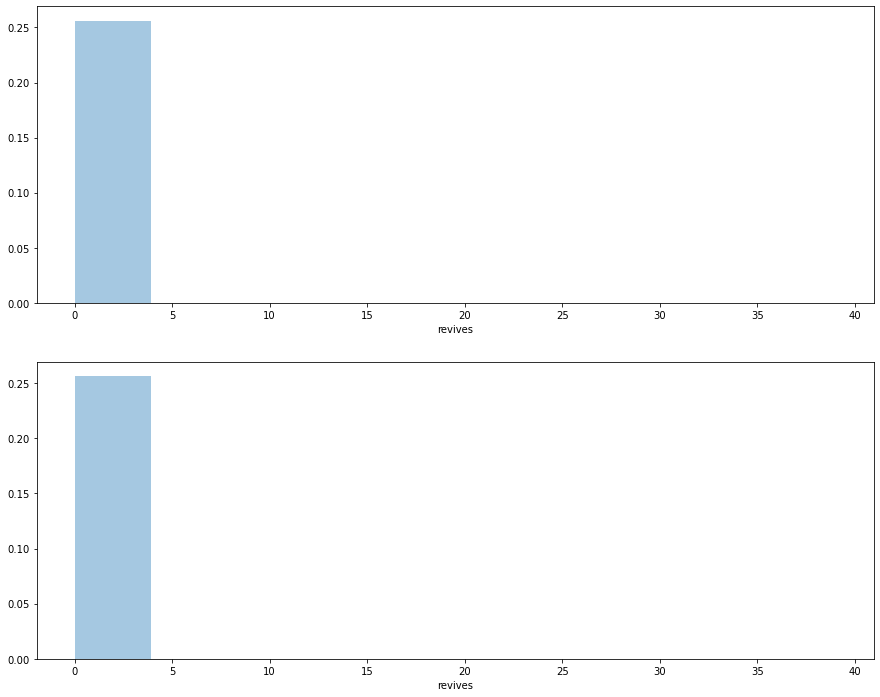

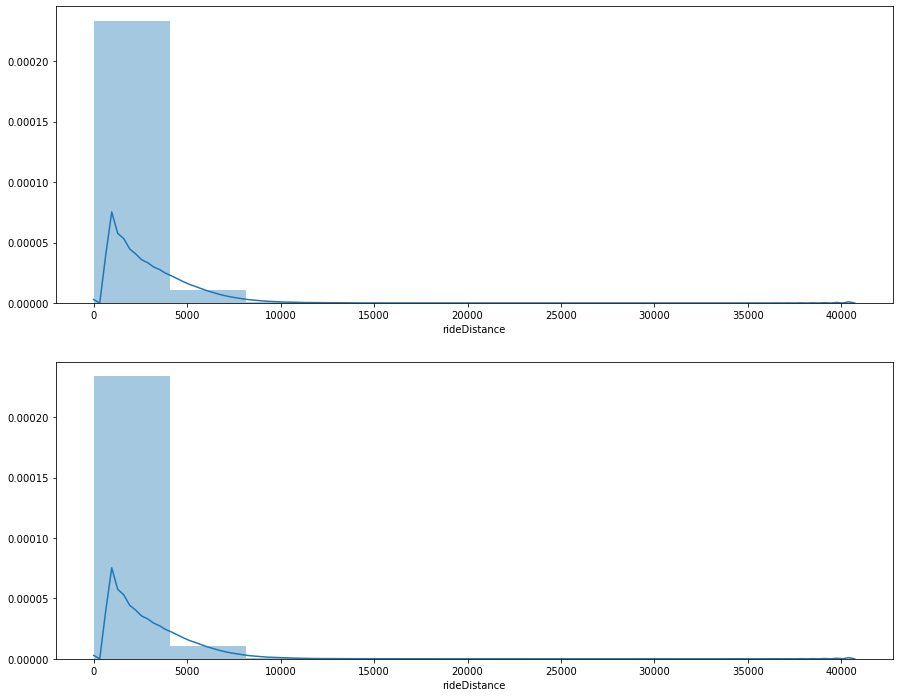

C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


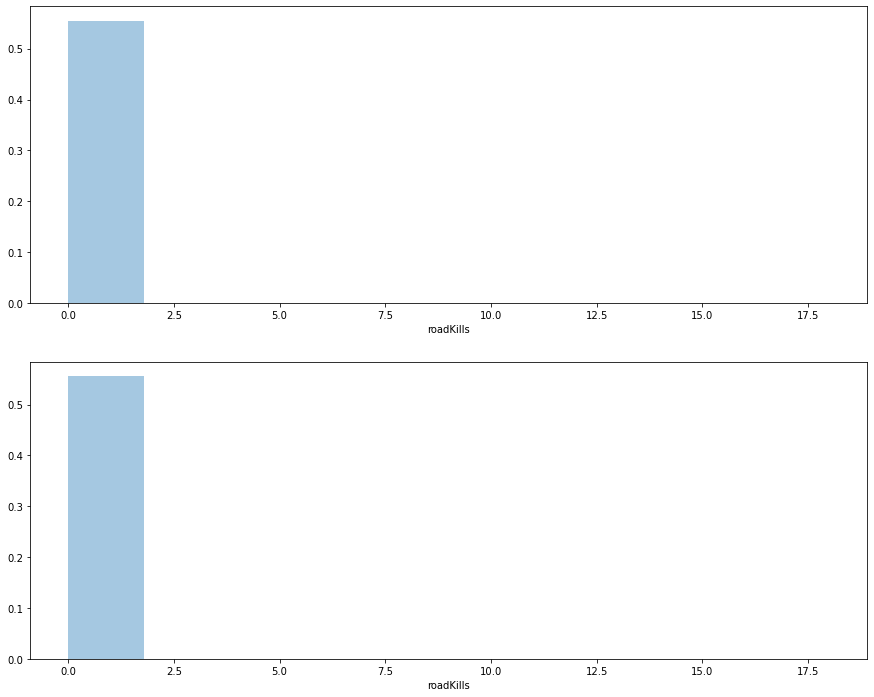

C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


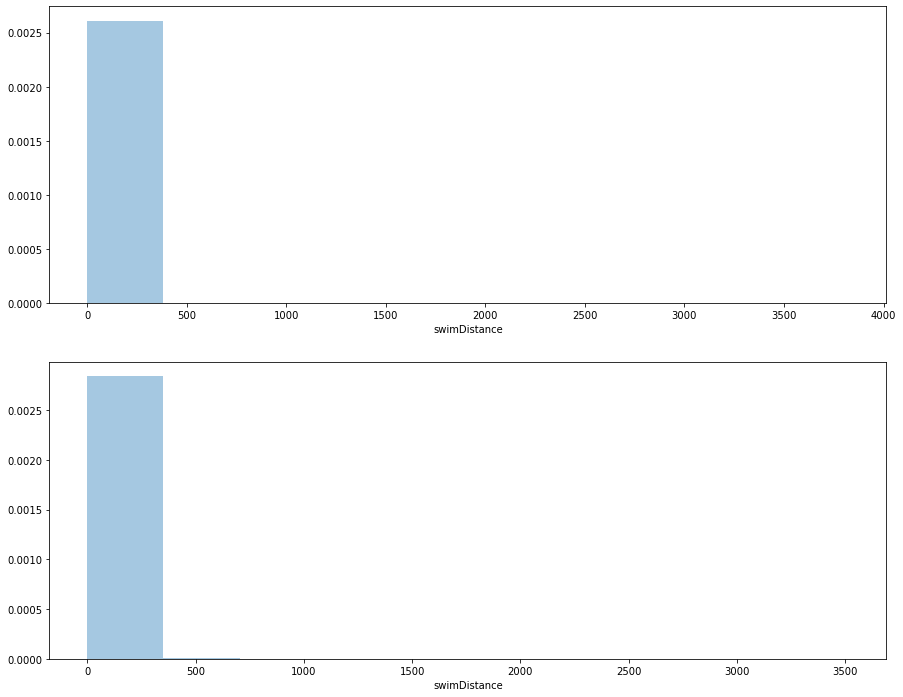

C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


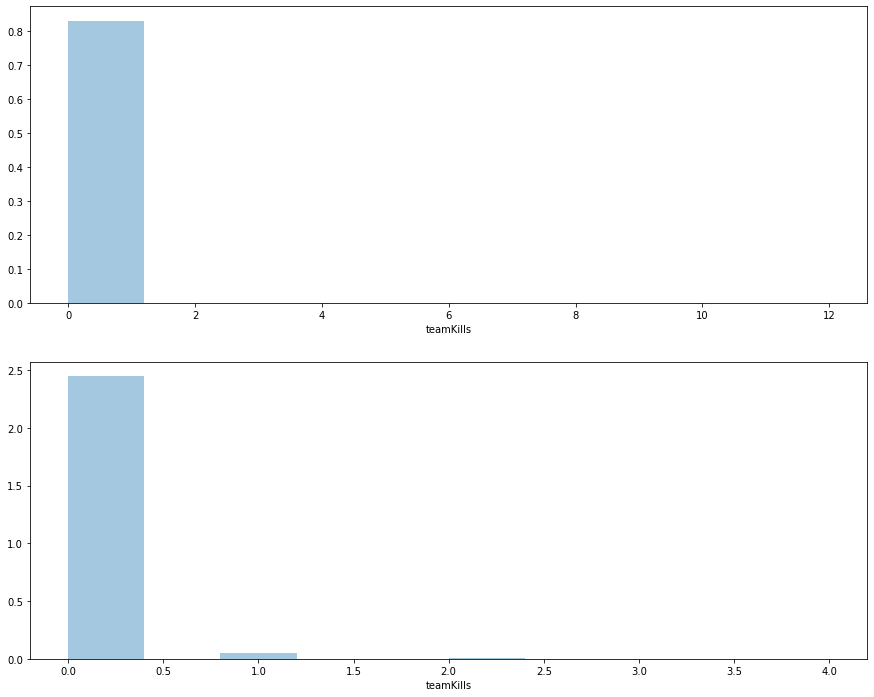

C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


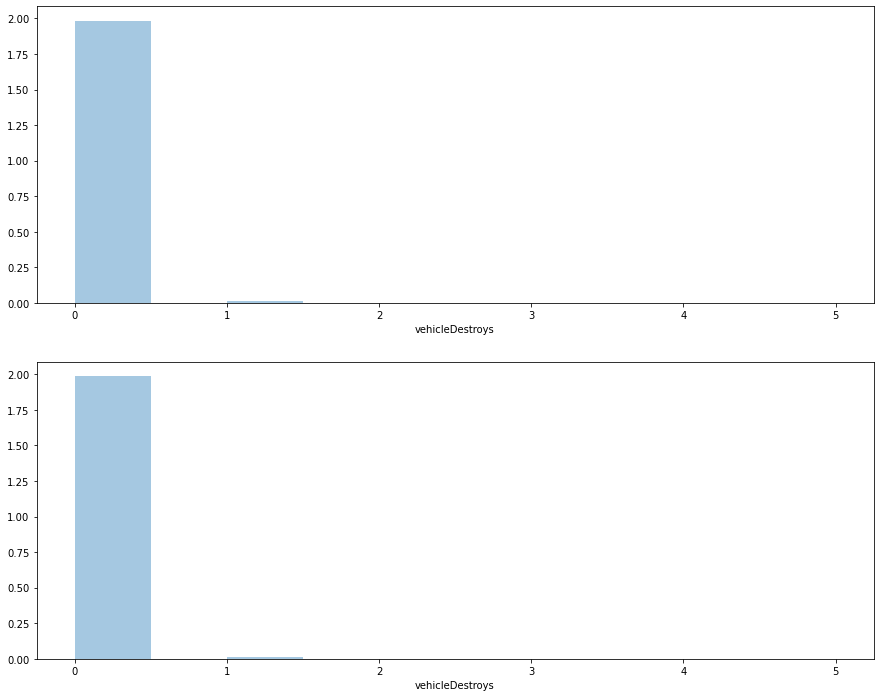

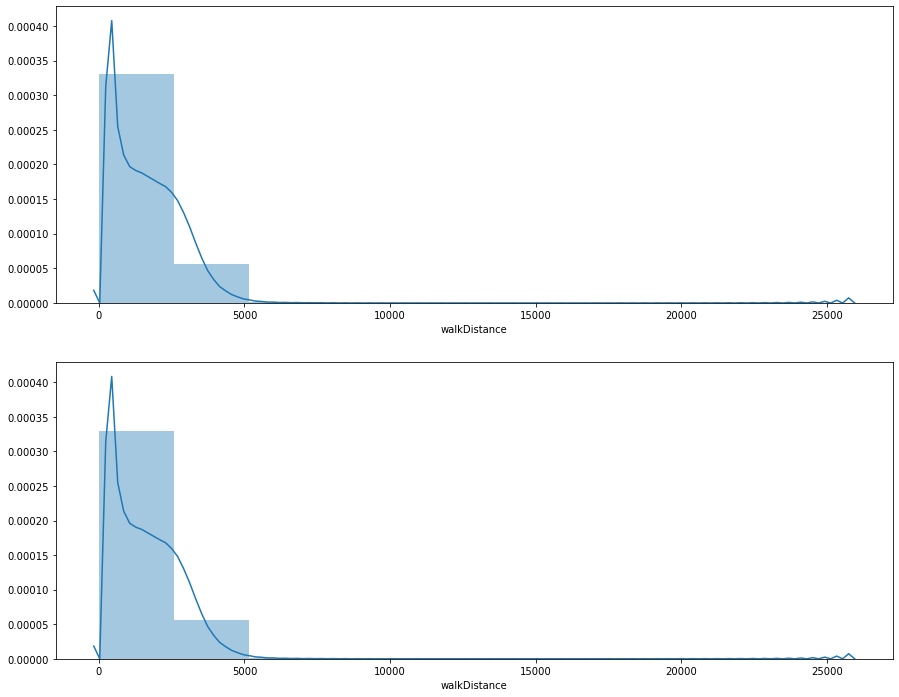

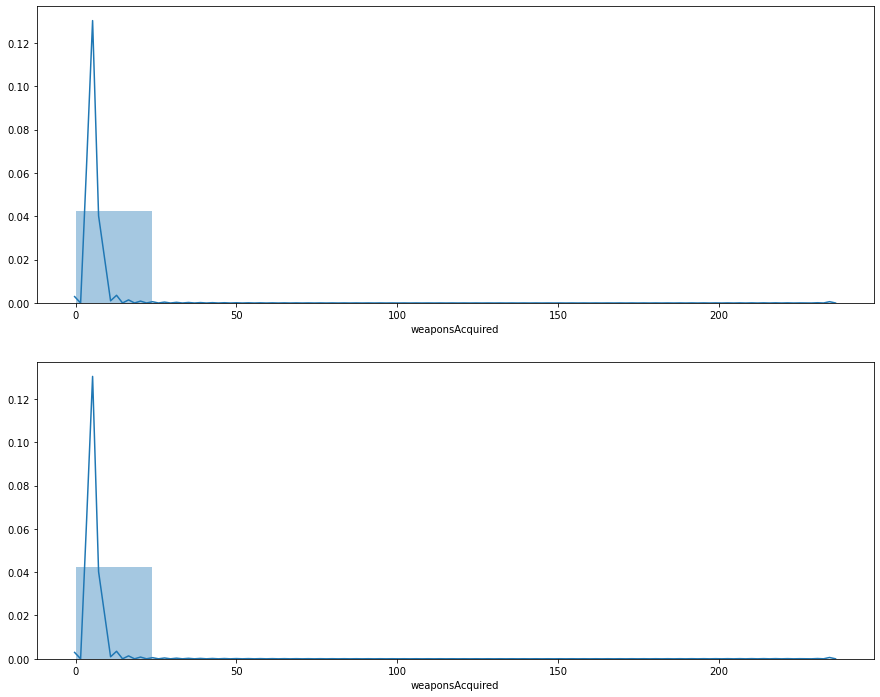

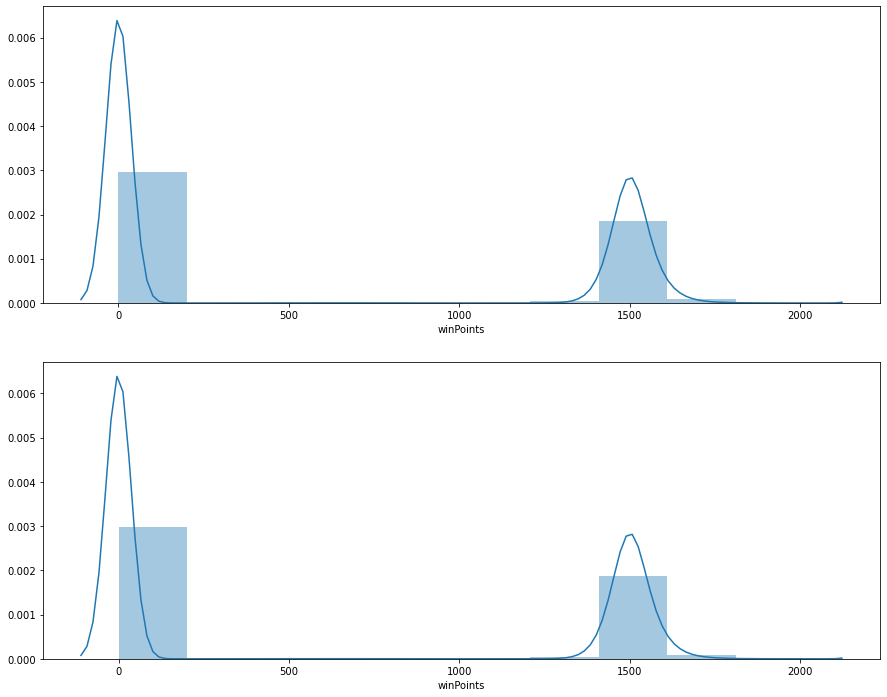

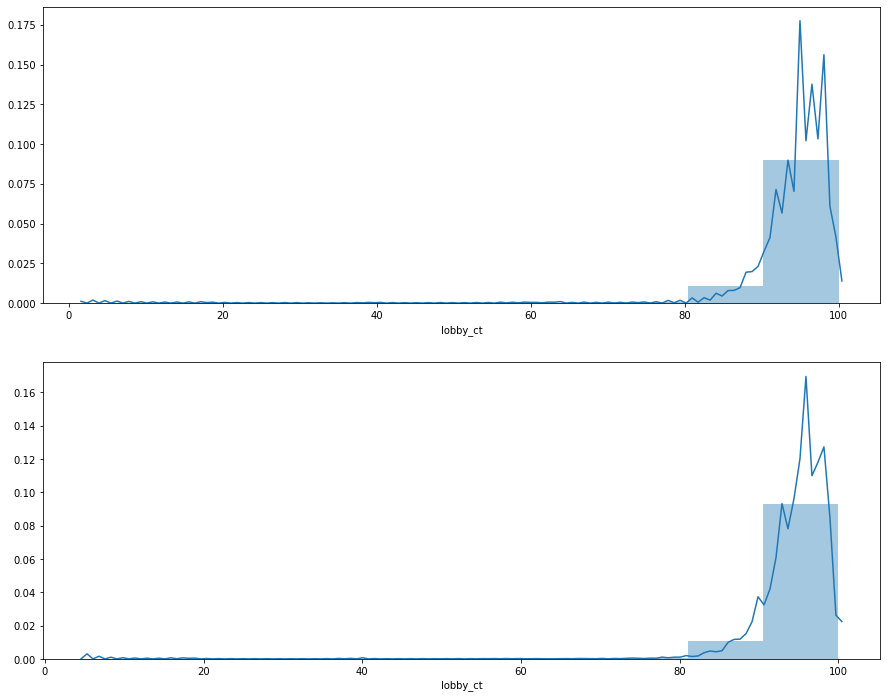

C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


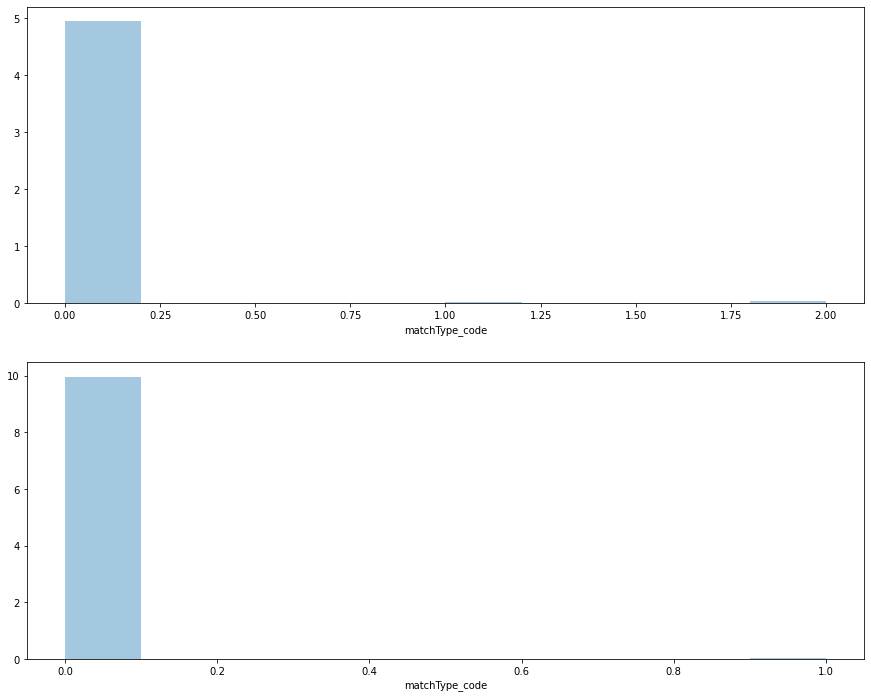

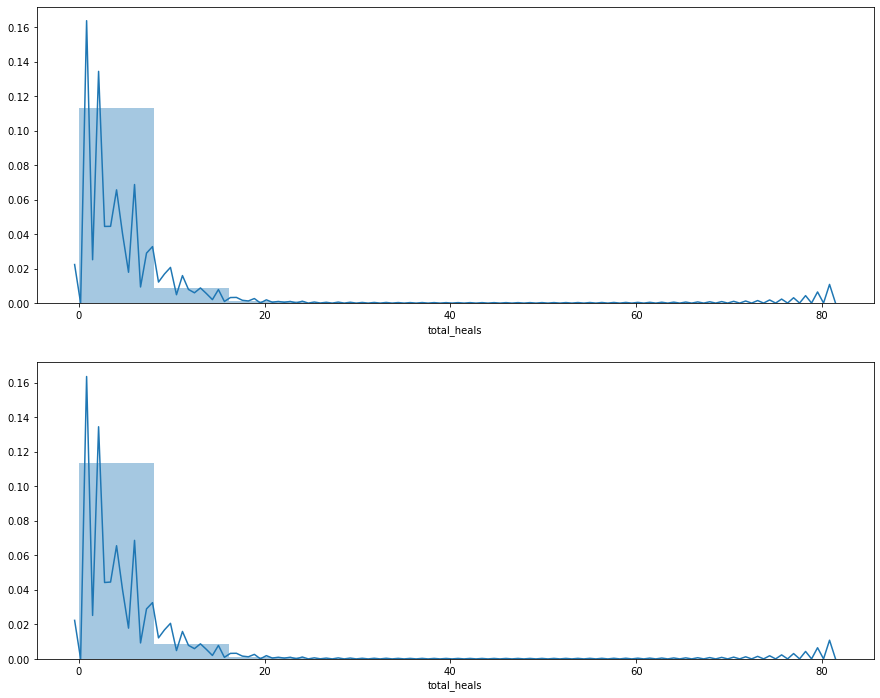

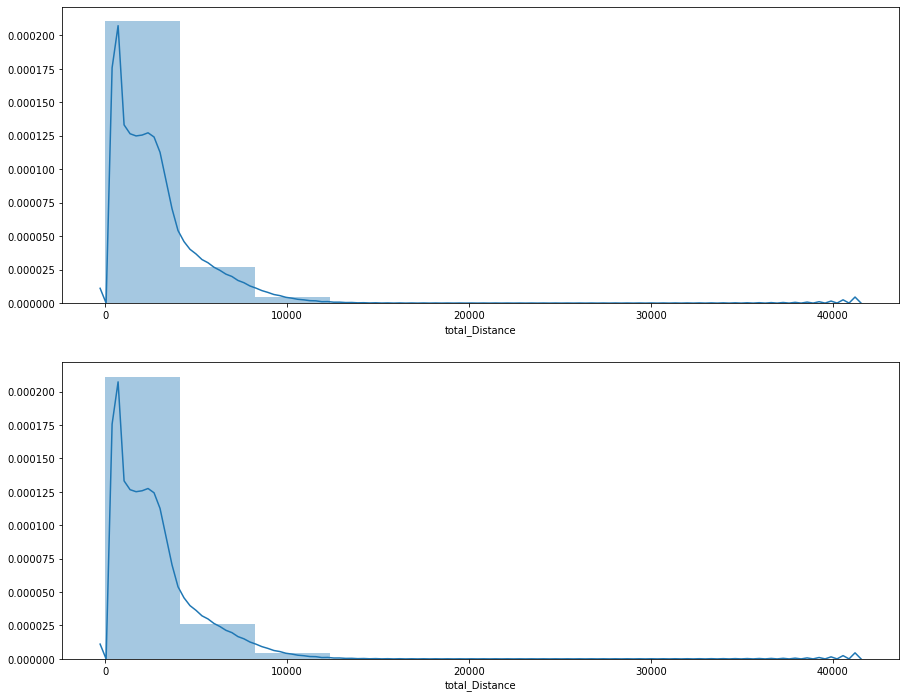

C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


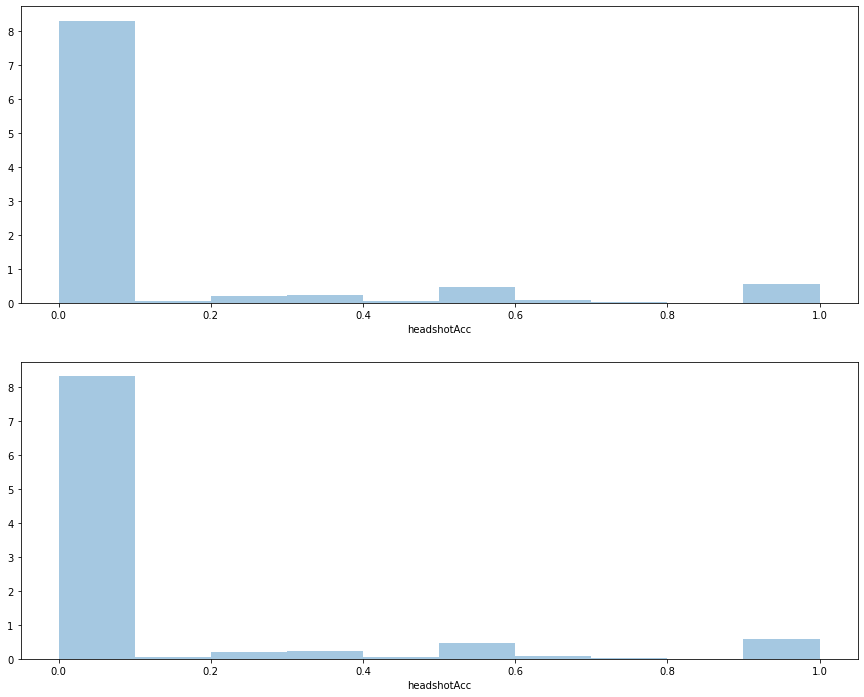

C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\bnebe\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


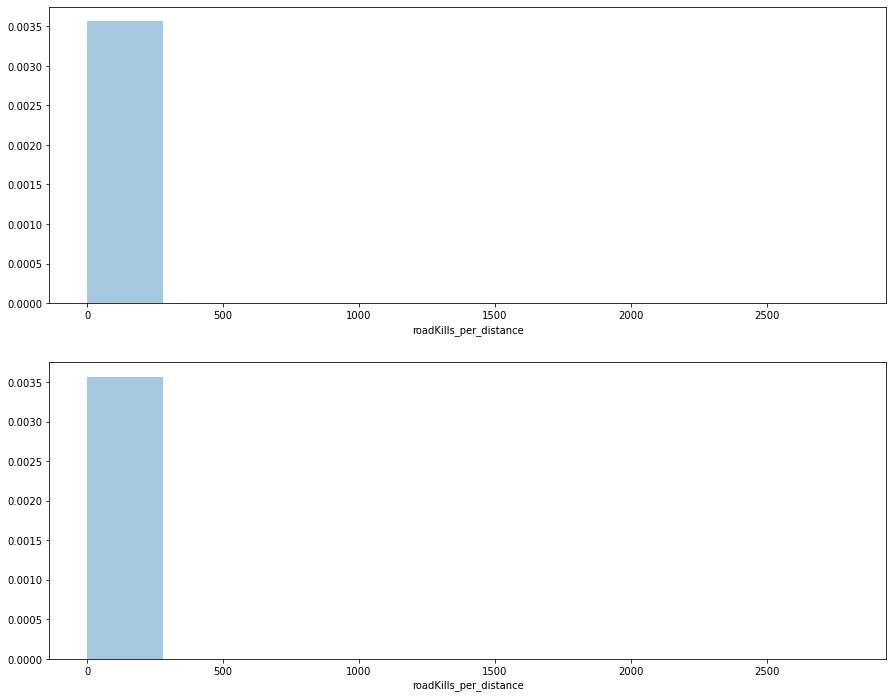

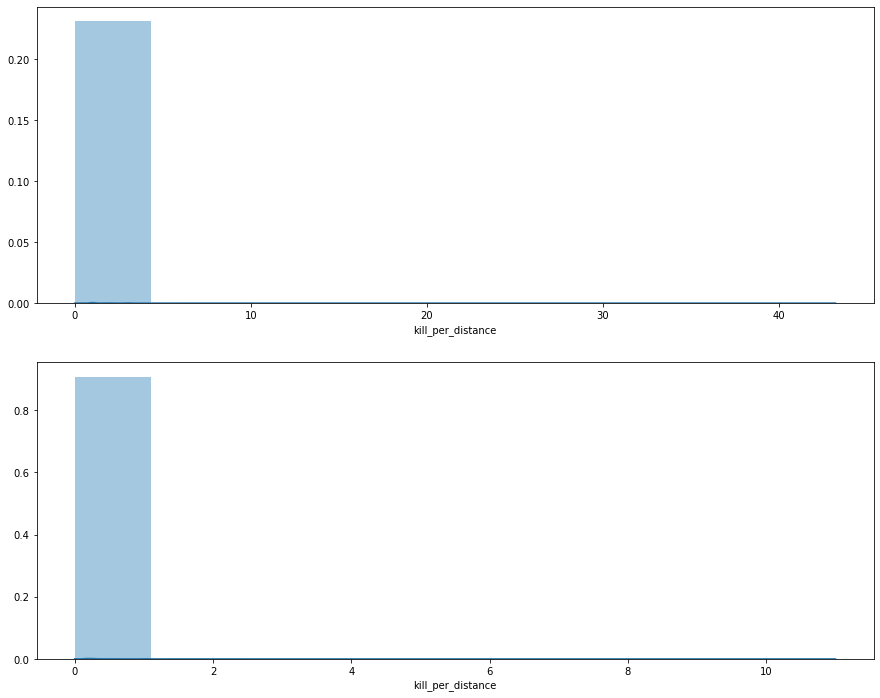

In [9]:
temp = df[df['matchType_code']<2]

for column in [c for c in temp if c not in ['Id', 'groupId', 'matchId', 'matchType', 'winPlacePerc']]:
    fig, axs = plt.subplots(2, figsize=(15,12))
    sns.distplot(df[column], bins=10, ax=axs[0])
    sns.distplot(temp[column], bins=10, ax=axs[1])
    plt.show()

It looks like we may have issues with headshot accuracy, road kills per distance, kills per distance, kills, longest kill, weapons acquired, and total heals.

### Summary

In [10]:
print('Players in regular matches with headshotAcc =1 and kills >4:', len(df[(df['headshotAcc']==1) & (df['matchType_code']<2) & (df['kills']>4)]))
print('Players in regular matches with roadKills_per_distance >1 and roadKills >1:', len(df[(df['roadKills_per_distance']>1) & (df['matchType_code']<2) & (df['roadKills']>1)]))
print('Players in regular matches with kill_per_distance >1 and roadKills >1:', len(df[(df['kill_per_distance']>1) & (df['matchType_code']<2) & (df['kills']>1)]))
print('Players in regular matches with kills >25:', len(df[(df['kills']>25) & (df['matchType_code']<2)]))
print('Players in regular matches with longestKill >=1000:', len(df[(df['longestKill']>=1000) & (df['matchType_code']<2)]))
print('Players in regular matches with weaponsAcquired >=100:', len(df[(df['weaponsAcquired']>=100) & (df['matchType_code']<2)]))
print('Players in regular matches with total_heals >=40:', len(df[(df['total_heals']>=40) & (df['matchType_code']<2)]))

Players in regular matches with headshotAcc =1 and kills >4: 416
Players in regular matches with roadKills_per_distance >1 and roadKills >1: 23
Players in regular matches with kill_per_distance >1 and roadKills >1: 13
Players in regular matches with kills >25: 2
Players in regular matches with longestKill >=1000: 3
Players in regular matches with weaponsAcquired >=100: 6
Players in regular matches with total_heals >=40: 344


In [11]:
cheater_groups = []
cheater_groups = cheater_groups + df[(df['headshotAcc']==1) & (df['matchType_code']<2) & (df['kills']>4)]['groupId'].tolist()
cheater_groups = cheater_groups + df[(df['roadKills_per_distance']>1) & (df['matchType_code']<2) & (df['roadKills']>1)]['groupId'].tolist()
cheater_groups = cheater_groups + df[(df['kill_per_distance']>1) & (df['matchType_code']<2) & (df['kills']>1)]['groupId'].tolist()
cheater_groups = cheater_groups + df[(df['kills']>25) & (df['matchType_code']<2)]['groupId'].tolist()
cheater_groups = cheater_groups + df[(df['longestKill']>=1000) & (df['matchType_code']<2)]['groupId'].tolist()
cheater_groups = cheater_groups + df[(df['weaponsAcquired']>=100) & (df['matchType_code']<2)]['groupId'].tolist()
cheater_groups = cheater_groups + df[(df['total_heals']>=40) & (df['matchType_code']<2)]['groupId'].tolist()

print('Potential groups with cheaters: {}'.format(len(cheater_groups)))
print('Percentage of groups with cheaters to total data set: {:1.4f}%'.format(len(cheater_groups)/len(df)*100))

Potential groups with cheaters: 807
Percentage of groups with cheaters to total data set: 0.0181%


While these stats are very suspicious we will most likely not remove them due to their insufficient representation in the data set.

## Feature Engineering / Selection

First lets look at a correlation map of Solo and Multiperson games in the dataset before any engineering.

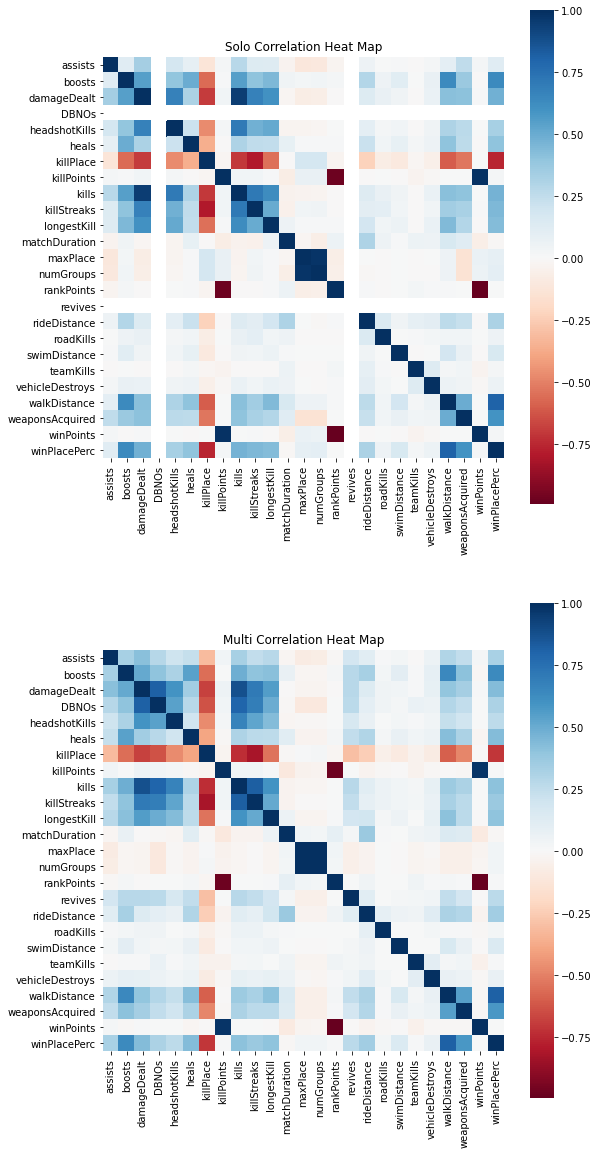

In [12]:
solo_df = pfunc.load_df('solo', True)
multi_df = pfunc.load_df('solo', False)

features = [c for c in solo_df if c not in drop_columns]

solo_corr = solo_df[features].corr()
multi_corr = multi_df[features].corr()

fig, axs = plt.subplots(2, figsize=(9,20))

sns.heatmap(solo_corr, 
            xticklabels=solo_corr.columns.values,
            yticklabels=solo_corr.columns.values,
            cmap='RdBu',
            square=True,
            ax=axs[0])

sns.heatmap(multi_corr, 
            xticklabels=multi_corr.columns.values,
            yticklabels=multi_corr.columns.values,
            cmap='RdBu',
            square=True,
            ax=axs[1])

axs[0].set_title('Solo Correlation Heat Map')
axs[1].set_title('Multi Correlation Heat Map')

plt.show()

According to these maps, boosts, killPlace, walkDistance, and weaponsAcquired have a decent impact on winPlacePerc for both game types. We can see that inidividual stats (damageDealt, kills, etc.) correlate with winning better in solo games. This is likely because one single person can rarely carry a team in the "Multi" game modes, to accommodate for this we will need to combine stats among the group for better correlation.

#### Feature Experiments

Next we'll cycle through different engineered features testing them against a simple regression model to see their effect on the mean squared error of the model.

In [13]:
experiments = [pfunc.original, pfunc.lobby_ct, pfunc.total_kills, pfunc.matchType_code,
               pfunc.perspective_code,
               pfunc.total_heals, pfunc.kills_norm, pfunc.damageDelt_norm, pfunc.headshotAcc, 
               pfunc.total_distance, pfunc.distance_per_kill, pfunc.kill_per_distance, 
               pfunc.heal_per_kill, pfunc.kill_per_heal, pfunc.heal_per_distance, 
               pfunc.distance_per_heal, pfunc.portion_of_kills,
               pfunc.group_killPlace_avg, pfunc.min_by_group, pfunc.max_by_group, 
               pfunc.sum_by_group, pfunc.median_by_group, pfunc.mean_by_group, 
               pfunc.rank_by_group]

# Test All, Single-player game modes, and Multi-player game modes
match_contains = {'All':('',True), 'Single':('solo',True), 'Multi':('solo',False)}

# Create empty DataFrame and added mean squared scores for each experiment
full_results = pd.DataFrame(data=[e.__name__ for e in experiments], columns=['name'])

for n, t in match_contains.items():
    results = pfunc.run_experiments_lr(experiments, t[0], t[1])
    full_results = full_results.merge(results, on='name', how='left', suffixes=['','_'+n])

full_results = full_results.set_index('name', drop=True)

print(full_results)

original
lobby_ct
total_kills
matchType_code
perspective_code
total_heals
kills_norm
damageDelt_norm
headshotAcc
total_distance
distance_per_kill
kill_per_distance
heal_per_kill
kill_per_heal
heal_per_distance
distance_per_heal
portion_of_kills
group_killPlace_avg
min_by_group
max_by_group
sum_by_group
median_by_group
mean_by_group
rank_by_group
original
lobby_ct
total_kills
matchType_code
perspective_code
total_heals
kills_norm
damageDelt_norm
headshotAcc
total_distance
distance_per_kill
kill_per_distance
heal_per_kill
kill_per_heal
heal_per_distance
distance_per_heal
portion_of_kills
group_killPlace_avg
min_by_group
max_by_group
sum_by_group
median_by_group
mean_by_group
rank_by_group
original
lobby_ct
total_kills
matchType_code
perspective_code
total_heals
kills_norm
damageDelt_norm
headshotAcc
total_distance
distance_per_kill
kill_per_distance
heal_per_kill
kill_per_heal
heal_per_distance
distance_per_heal
portion_of_kills
group_killPlace_avg
min_by_group
max_by_group
sum_by_group


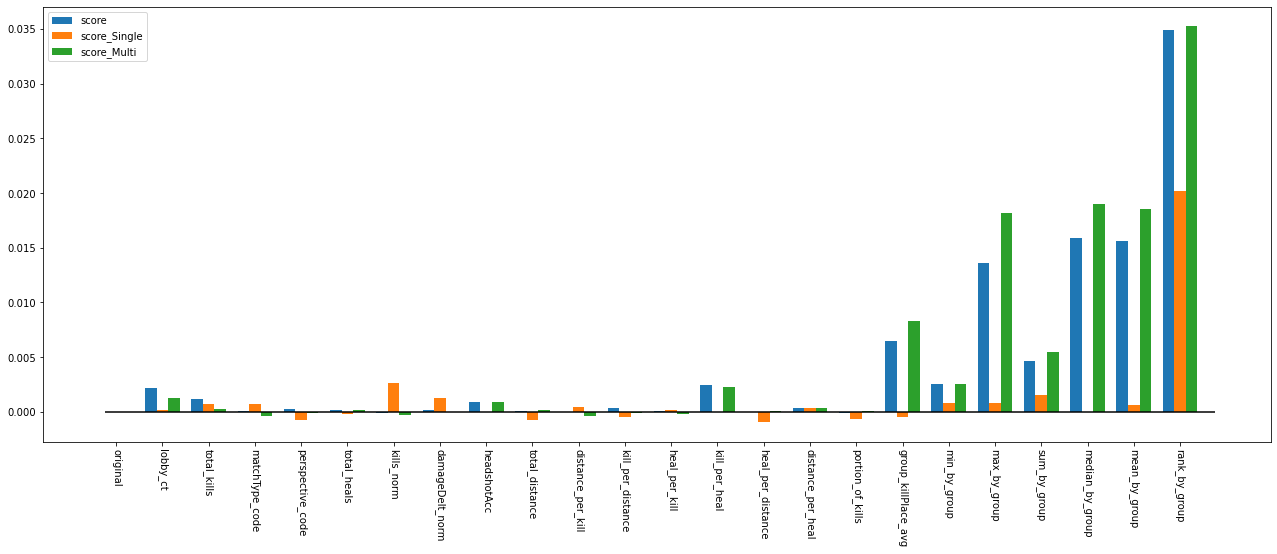

In [84]:
results_difference = full_results.subtract(full_results.loc['original'], axis=1) * -1

N = 24
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(22,8))

for x in range(0,3):
    height = results_difference.iloc[:, x]
    label = results_difference.columns.values[x]
    plt.bar(ind + ((x)*width), height, width, label=label, align='center')


plt.xticks(ind + width, labels=results_difference.index.tolist(), rotation=270)
plt.legend(loc='best')
plt.hlines(0, 0, 24)
plt.show()

As we can see creating features for the individual effects the Single-Player game mode the most.  Additionally it seems that ranking players against others in the same match has the largest effect on all models.

#### Engineered Feature Correlation

In [16]:
# Added new features for testing
df = pfunc.load_df()

df['lobby_ct'] = df.groupby('matchId')['matchId'].transform('count')

df['matchType_code'] = df['matchType'].apply(lambda x: 0 if x in regular_matches else 1 if x in event_matches else 2)
df['perspective_code'] = df['matchType'].apply(lambda x: 0 if 'fpp' in x else 1)

df['total_heals'] = df['boosts'] + df['heals']
df['total_Distance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']
df['kills_norm'] = df['kills']*(((100-df['lobby_ct'])/100)+1)
df['damageDealt_norm'] = df['damageDealt']*(((100-df['lobby_ct'])/100)+1)

df['headshotAcc'] = df['headshotKills'] / df['kills']
df['headshotAcc'].fillna(0, inplace=True)
df['headshotAcc'].replace(np.inf, 0, inplace=True)

df['kill_per_heal'] = df['kills'] / df['total_heals']
df['kill_per_heal'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['kill_per_heal'].fillna(df['kills'], inplace=True)

df['distance_per_heal'] = df['total_Distance'] / df['total_heals']
df['distance_per_heal'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['distance_per_heal'].fillna(df['total_Distance'], inplace=True)

In [21]:
# Rank features by their group within a mtach
non_rank_col = ['Id', 'groupId', 'matchId', 'matchType', 'matchDuration', 'matchType_code', 'perspective_code', 'winPlacePerc']
features = [c for c in df if c not in non_rank_col]
agg = df.groupby(['matchId', 'groupId'])[features].mean()
agg = agg.groupby('matchId')[features].rank(pct=True)
df = df.merge(agg, suffixes=['', '_rank'], how='left', on=['matchId', 'groupId'])

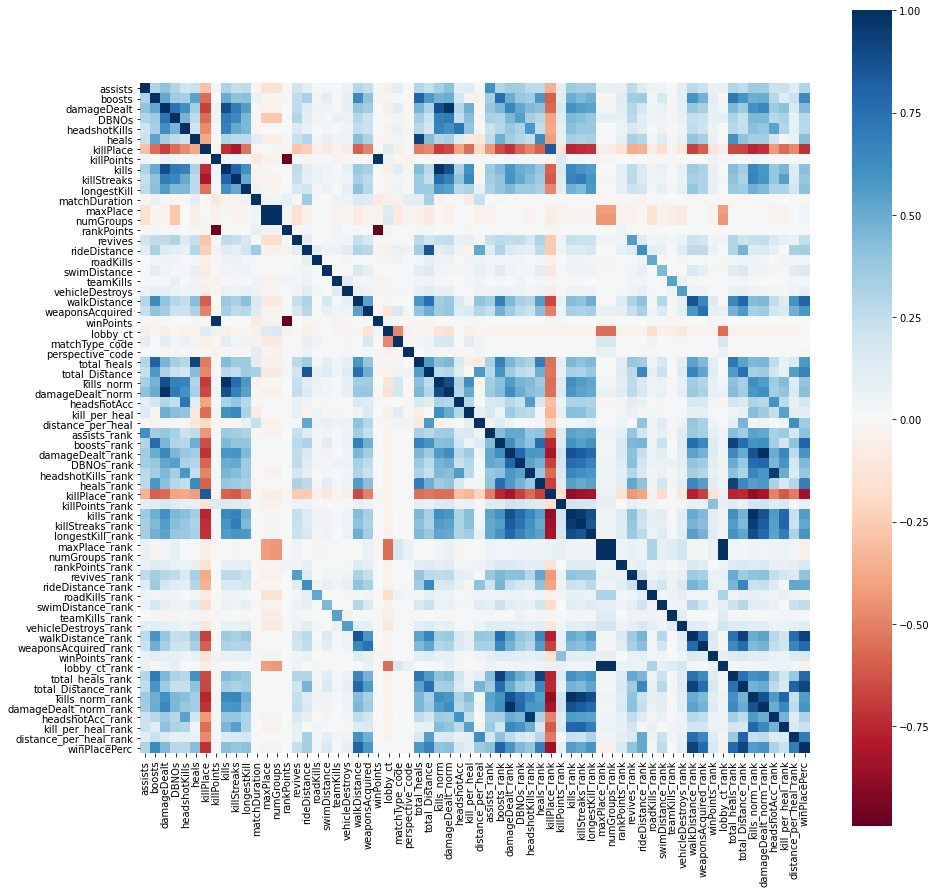

In [33]:
# Correlation heat map with chosen engineered features
features = [c for c in df if c not in drop_columns]
features = [c for c in features if c not in ['winPlacePerc']] + ['winPlacePerc']

df_corr = df[features].corr()

solo_corr = df[df['matchType'].str.contains('solo')==True]
multi_corr = df[df['matchType'].str.contains('solo')==False]


fig, axs = plt.subplots(2, figsize=(15,30))

sns.heatmap(solo_corr, 
            xticklabels=solo_corr.columns.values,
            yticklabels=solo_corr.columns.values,
            cmap='RdBu',
            square=True,
            ax=axs[0])

sns.heatmap(multi_corr, 
            xticklabels=multi_corr.columns.values,
            yticklabels=multi_corr.columns.values,
            cmap='RdBu',
            square=True,
            ax=axs[1])

plt.show()

#### Feature Importance in Random Forest

Here we will pass the newly engineered features into a simple random forest regressor to measure their importance in the model.

In [ ]:
# Create simple(ish) random forest to see feature importance
from sklearn.ensemble import RandomForestRegressor

y = 'winPlacePerc'
X_cols = [c for c in df if c not in (drop_columns+[y])]

train, test = pfunc.train_test_split(df)

model = RandomForestRegressor(n_estimators = 1,
                              criterion='mae', 
                              max_depth=25)

model.fit(train[X_cols], train[y])

importances = model.feature_importances_

In [ ]:
# Collect importances in DataFrame
imp_num = []
imp_score = []

for i,v in enumerate(importances):
    imp_num.append(i)
    imp_score.append(v)

imp_df = pd.DataFrame(list(zip(imp_num, X_cols, imp_score)), columns=['number', 'feature', 'score'])

In [ ]:
# Graph top 10 importances
imp_df.sort_values(by='score', ascending=False, inplace=True)

temp = imp_df.head(10)

labels = temp['feature']
height = temp['score']

x_pos = [i for i in range(len(labels), 0, -1)]

plt.figure(figsize=(15,10))
plt.barh(x_pos, height)
plt.yticks(x_pos, labels)

plt.show()